In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

orders = pd.read_csv("./data/instacart/orders.csv")
prior = pd.read_csv('./data/instacart/order_products__prior.csv')
products = pd.read_csv('./data/instacart/products.csv')
aisles = pd.read_csv('./data/instacart/aisles.csv')
_mt = pd.merge(prior, products, on=['product_id', 'product_id'])
_mt = pd.merge(_mt, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mt, aisles, on=['aisle_id', 'aisle_id'])
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])

pca = PCA(n_components=6)
pca_samples = pca.fit_transform(cust_prod)
pca_samples

In [2]:
km = KMeans(n_clusters=4)

In [3]:
mean = km.fit(pca_samples)

In [4]:
predict = mean.predict(pca_samples)
predict

array([0, 2, 0, ..., 2, 1, 0], dtype=int32)

In [5]:
predict[:100]

array([0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0], dtype=int32)

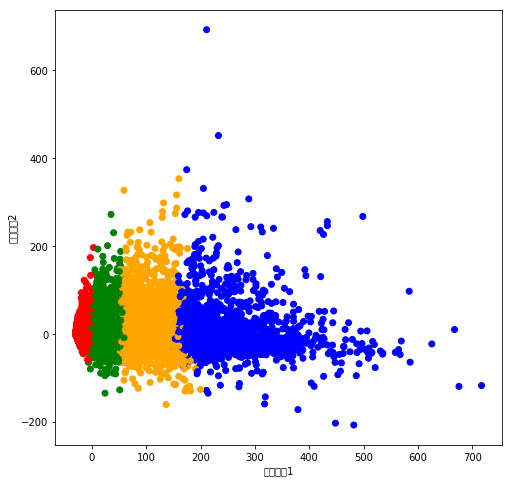

In [7]:
plt.figure(figsize=(8,8))
colored = ["red", "orange", "green", "blue"]
col = [colored[k] for k in predict]
plt.scatter(pca_samples[:, 0], pca_samples[:, 4], color=col)
plt.xlabel("降维特征1")
plt.ylabel("降维特征2")
plt.show()

In [ ]:
silhouette_score(pca_samples, predict)

In [1]:
print("ok")

ok
